In [4]:
import pandas as pd

# Load messy dataset
df = pd.read_csv("housing_big_messy.csv")

# Look at first 5 rows
print(df.head())

# Get dataset info
print(df.info())

# Basic stats
print(df.describe())


   MedInc  HouseAge  AveRooms AveBedrms  Population  AveOccup  Latitude  \
0   0.331        35      7.11      3.65      1030.0      4.31   40.5536   
1   0.207        33      6.55      3.18      4354.0      2.27   38.3630   
2   0.387        20      3.86      1.88      3193.0      2.61   32.6178   
3   0.413        39      6.85      2.99       957.0      3.26   37.0239   
4   0.150        37      6.85      3.56       755.0      2.85   34.5001   

   Longitude  MedHouseVal  
0  -120.1867        1.626  
1  -123.2230        1.397  
2  -123.5267        1.519  
3  -117.6822        1.976  
4  -122.9484        0.322  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6050 entries, 0 to 6049
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       6050 non-null   float64
 1   HouseAge     6050 non-null   int64  
 2   AveRooms     5995 non-null   float64
 3   AveBedrms    5990 non-null   object 
 4   Population   5994 

handling missing values 

In [20]:

print(df.isnull().sum())
df = df.dropna(thresh=5)  

for col in df.select_dtypes(include=['float64','int64']).columns:
    df[col] = df[col].fillna(df[col].median())

for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna(df[col].mode()[0])


MedInc          0
HouseAge        0
AveRooms       54
AveBedrms      58
Population     54
AveOccup        0
Latitude        0
Longitude       0
MedHouseVal     0
dtype: int64


Remove duplicates 

In [21]:
df = df.drop_duplicates()

df['AveBedrms'] = pd.to_numeric(df['AveBedrms'], errors='coerce')

df['AveBedrms'] = df['AveBedrms'].fillna(df['AveBedrms'].median())


outlier handling 

In [22]:
import numpy as np

from scipy import stats
z = np.abs(stats.zscore(df['MedInc']))
df = df[(z < 3)]  


visual

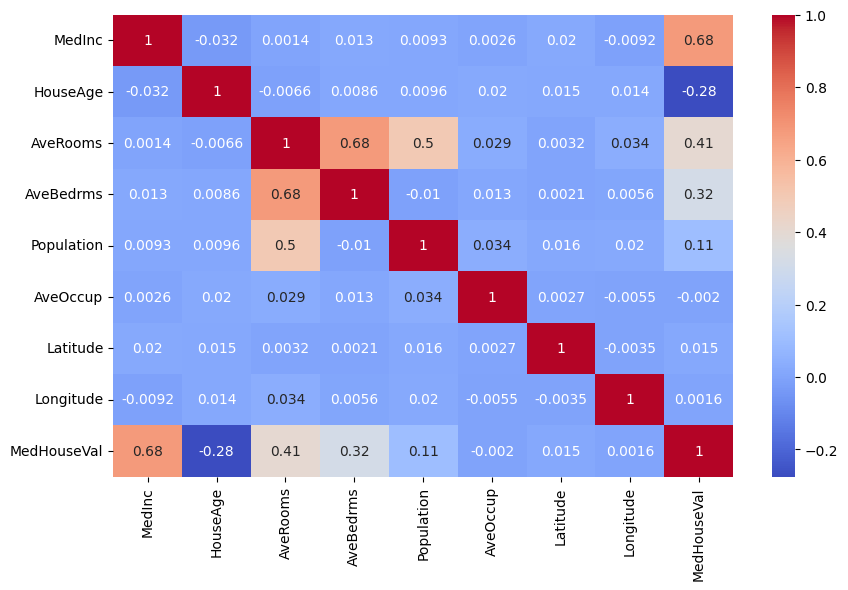

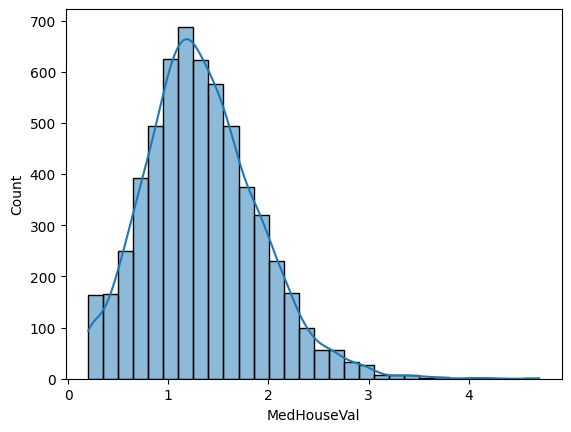

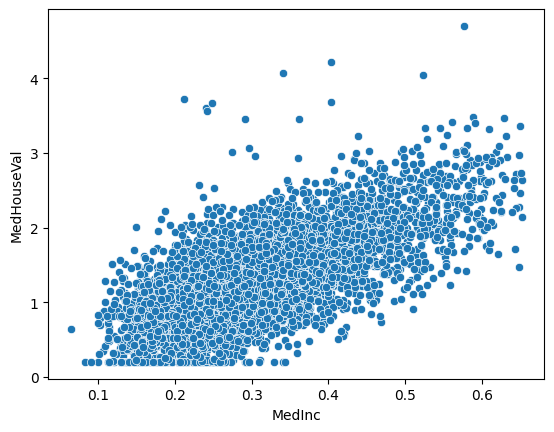

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

sns.histplot(df['MedHouseVal'], bins=30, kde=True)
plt.show()

sns.scatterplot(x='MedInc', y='MedHouseVal', data=df)
plt.show()


simple linear regression

R2 Score: 0.5253361374657141
MSE: 0.17480323755808688


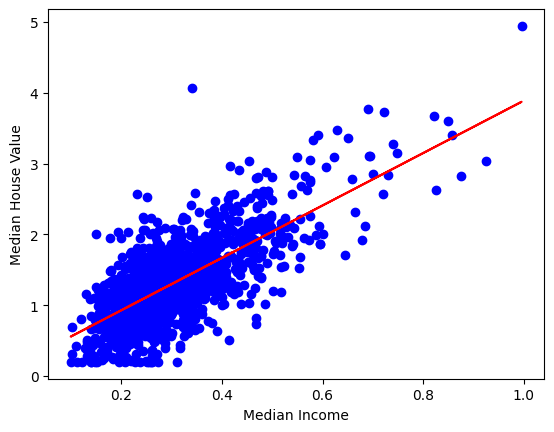

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

df = pd.read_csv("housing_big_messy.csv")

df = df.dropna(subset=["MedHouseVal", "MedInc"]).reset_index(drop=True)

X = df[["MedInc"]]
y = df["MedHouseVal"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print("R2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

plt.scatter(X_test, y_test, color="blue")
plt.plot(X_test, y_pred, color="red")
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.show()


multiple 

In [10]:
from sklearn.linear_model import LinearRegression

df = pd.read_csv("housing_big_messy.csv")

df = df.dropna(subset=["MedHouseVal", "MedInc", "AveRooms", "AveOccup"]).reset_index(drop=True)

X = df[["MedInc", "AveRooms", "AveOccup"]]
y = df["MedHouseVal"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

mlr = LinearRegression()
mlr.fit(X_train, y_train)
y_pred = mlr.predict(X_test)

print("R2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


R2 Score: 0.6707756671267168
MSE: 0.11649657314199247


polynomial

R2 Score: 0.525570145120942
MSE: 0.1747170601618789


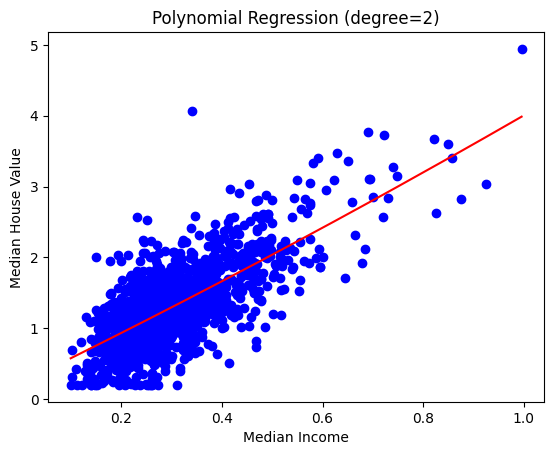

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

df = pd.read_csv("housing_big_messy.csv")
df = df.dropna(subset=["MedHouseVal", "MedInc"]).reset_index(drop=True)


X = df[["MedInc"]]
y = df["MedHouseVal"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

poly = PolynomialFeatures(degree=2)  
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)

y_pred = model.predict(X_test_poly)


print("R2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


plt.scatter(X_test, y_test, color="blue")

sorted_zip = sorted(zip(X_test["MedInc"], y_pred))
X_sorted, y_sorted = zip(*sorted_zip)
plt.plot(X_sorted, y_sorted, color="red")
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.title("Polynomial Regression (degree=2)")
plt.show()
